<a href="https://colab.research.google.com/github/rupesh743/CP_Appliance_energy_prediction/blob/main/%5BSupervised_ML_Appliances_Energy_Prediction%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Appliances Energy Prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Team
##### **Team Member 1 -Nalin Ranjan**
##### **Team Member 2 -Poonam Yadav**
##### **Team Member 3 -Deepak Kumar**
##### **Team Member 4 -Prakriti Pathak**
##### **Team Member 5 -Rupesh Gandhi**

# **Project Summary -**

The "data_application_energy.csv" dataset contains information on the energy consumption of a building as well as various environmental and temporal variables that may influence energy usage. The aim of this regression project is to develop a model that can accurately predict energy usage based on these variables.

Data Preprocessing and Feature Engineering

Before building the regression models, the data was cleaned and preprocessed. This involved checking for missing values, removing duplicates, and scaling the numerical features to ensure that they were on the same scale. Additionally, new features were engineered, such as time of day and day of the week, which were extracted from the timestamp feature.

Exploratory Data Analysis

Exploratory data analysis was performed to gain insights into the relationships between the features and energy consumption. This involved visualizing the distributions of the features, plotting scatterplots, and computing correlation coefficients. The results of the analysis showed that temperature, humidity, and lighting were strongly correlated with energy consumption, while day of the week and time of day had weaker correlations.

Model Selection and Evaluation

Several regression models were trained and evaluated on the dataset. These models included linear regression, decision tree regression, and random forest regression. The models were assessed based on their ability to accurately predict energy usage, as measured by the root mean squared error (RMSE) and R-squared values.

Linear Regression

Linear regression was used to build a baseline model. The model achieved an RMSE of 8.48 and an R-squared value of 0.80 on the test data. This suggests that the model can explain 80% of the variance in energy consumption based on the given features.

Decision Tree Regression

Decision tree regression was used to capture non-linear relationships between the features and energy consumption. The model was tuned using cross-validation to find the optimal depth. The best decision tree regression model achieved an RMSE of 7.84 and an R-squared value of 0.83 on the test data. This suggests that the model can explain 83% of the variance in energy consumption based on the given features.

Random Forest Regression

Random forest regression was used as a more complex model that can capture non-linear relationships and interactions between the features. The model was tuned using cross-validation to find the optimal number of trees and maximum depth. The best random forest regression model achieved an RMSE of 6.49 and an R-squared value of 0.89 on the test data. This suggests that the model can explain 89% of the variance in energy consumption based on the given features.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem statement is to develop a machine learning model that can accurately predict energy consumption based on the given features. This can be useful for building managers, energy companies, and policymakers who need to optimize energy consumption, reduce costs, and minimize the environmental impact of energy usage.

Specifically, the model should be able to take into account the various factors that influence energy consumption, such as temperature, humidity, lighting, and time of day, and accurately predict energy usage based on these variables. This can help building managers and energy companies to identify patterns and trends in energy consumption, and make informed decisions about energy usage, such as adjusting HVAC settings, optimizing lighting, or implementing energy-efficient technologies. Additionally, policymakers can use this information to develop policies and incentives that promote energy efficiency and sustainability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import plotly.express as px
import missingno as mno #install running pip install missingno on cmd if using PYPI directly or conda install -c conda-forge missingno -if using anaconda)\
import plotly.offline as py #Package for data visulization
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from  sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

file_path ='/content/drive/MyDrive/data_application_energy.csv'
df=pd.read_csv(file_path,encoding_errors='ignore')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(19735, 29)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
nan_count = df.isna().sum(axis = 0)
nan_count

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
# Visualizing the missing values

### What did you know about your dataset?

The dataset contains information related to energy usage or consumption in a certain application for a building in Belgium. \It includes various features that are related to energy usage, such as temperature, humidity, lighting, time of day, and other environmental or temporal variables. We used the dataset to develop predictive models to forecast energy consumption or identify factors that contribute to high or low energy usage.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Variables Description 

**Variable Description**
date: date  format yyyy-mm-dd
time: time  format hh:mm:ss

Appliances: energy consumption of different appliances the building, measured watt-hours (Wh)

kitchen_temperature: temperature, the kitchen area (Celsius)

kitchen_humidity: humidity, the kitchen area (%)

living_room_temperature: temperature, the living room area (Celsius)

living_room_humidity: humidity, the living room area (%)

laundry_room_temperature: temperature, the laundry room area (Celsius)

laundry_room_humidity: humidity, the laundry room area (%)

office_temperature: temperature, the office room (Celsius)

office_humidity: humidity, the office room (%)

bathroom_temperature: temperature, the bathroom (Celsius)

bathroom_humidity: humidity, the bathroom (%)

outside_temperature: temperature, outside the building (Celsius)

outside_pressure: pressure, outside the building (mm Hg)

outside_humidity: humidity, outside the building (%)

wind_speed: wind speed (m/s)

wind_direction: wind direction (degrees)

visibility: visibility (km)

dew_point_temperature: dew point temperature (Celsius)

rv1: a random variable, non-dimensional

rv2: another random variable, non-dimensional

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
column_list = df.columns.values.tolist()
no_unique=[]
for column_name in column_list:
  no_unique.append(df[column_name].nunique())
unique = pd.DataFrame(list(zip(column_list, no_unique)),
               columns =['variable', 'no. of uniques values'])
unique.head(10)

,variable,no. of uniques values
0,date,19735
1,Appliances,92
2,lights,8
3,T1,722
4,RH_1,2547
5,T2,1650
6,RH_2,3376
7,T3,1426
8,RH_3,2618
9,T4,1390


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Rename the variables 
df = df.rename(columns={
    "date": "Date",
    "lights": "Light_Energy",
    "T1": "Kitchen_Temp",
    "RH_1": "Kitchen_Humidity",
    "T2": "Living_Room_Temp",
    "RH_2": "Living_Room_Humidity",
    "T3": "Laundry_Room_Temp",
    "RH_3": "Laundry_Room_Humidity",
    "T4": "Office_Room_Temp",
    "RH_4": "Office_Room_Humidity",
    "T5": "Bathroom_Temp",
    "RH_5": "Bathroom_Humidity",
    "T6": "Outside_North_Temp",
    "RH_6": "Outside_North_Humidity",
    "T7": "Ironing_Room_Temp",
    "RH_7": "Ironing_Room_Humidity",
    "T8": "Teenager_Room_Temp",
    "RH_8": "Teenager_Room_Humidity",
    "T9": "Parents_Room_Temp",
    "RH_9": "Parents_Room_Humidity",
    "T_out": "Outside_Temp",
    "Press_mm_hg": "Pressure",
    "RH_out": "Outside_Humidity",
    "Windspeed": "WindSpeed",
    "Visibility": "Visibility",
    "Tdewpoint": "DewPoint_Temp",
    "rv1": "Random_Variable1",
    "rv2": "Random_Variable2",
})
df_new=df.copy()

#Added "5" New columns
df_new['Mean_indoor_temperature'] = df_new[['Kitchen_Temp', 'Living_Room_Temp', 'Laundry_Room_Temp', 'Office_Room_Temp', 'Bathroom_Temp', 'Outside_North_Temp', 'Ironing_Room_Temp', 'Teenager_Room_Temp', 'Parents_Room_Temp']].mean(axis=1)


df_new['Mean_indoor_humidity'] = df_new[['Kitchen_Humidity', 'Living_Room_Humidity', 'Laundry_Room_Humidity', 'Office_Room_Humidity', 'Bathroom_Humidity', 'Outside_North_Humidity', 'Ironing_Room_Humidity', 'Teenager_Room_Humidity', 'Parents_Room_Humidity']].mean(axis=1)


df_new['Total_consumption'] = df_new[['Appliances', 'Light_Energy']].sum(axis=1)


#Extracted Date, time, week, hour, month, day_of_week/weekend
df_new['Date']=pd.to_datetime(df["Date"],format='%Y-%m-%d %H:%M:%S')
df_new['Date'] =  pd.to_datetime(df['Date'],errors='ignore')
df_new['date1'] =(df_new['Date']).dt.date
df_new['time'] =df_new['Date'].dt.time
df_new['day_name'] = df_new['Date'].dt.day_name()
df_new['month'] = df_new['Date'].dt.month
df_new['week'] = df_new['Date'].dt.week
df_new['hour'] = df_new['Date'].dt.hour
df_new['dayofweek'] = df_new['Date'].dt.dayofweek
df_new['Day/Night'] = df_new['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')


#defined weather the day is a weekday or weekend
df_new['dayofweek/weekend']=''
for i in range(len(df_new)):
    if df_new['dayofweek'][i] >= 5:
        df_new['dayofweek/weekend'][i] = "weekend"
    else:
        df_new['dayofweek/weekend'][i] = "dayofweek"

df_new.head(1)


,Date,Appliances,Light_Energy,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,Office_Room_Humidity,Bathroom_Temp,Bathroom_Humidity,Outside_North_Temp,Outside_North_Humidity,Ironing_Room_Temp,Ironing_Room_Humidity,Teenager_Room_Temp,Teenager_Room_Humidity,Parents_Room_Temp,Parents_Room_Humidity,Outside_Temp,Pressure,Outside_Humidity,WindSpeed,Visibility,DewPoint_Temp,Random_Variable1,Random_Variable2,Mean_indoor_temperature,Mean_indoor_humidity,Total_consumption,date1,time,day_name,month,week,hour,dayofweek,Day/Night,dayofweek/weekend
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.9,17.033333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433,17.167407,50.910741,90,2016-01-11,17:00:00,Monday,1,2,17,0,Day,dayofweek


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

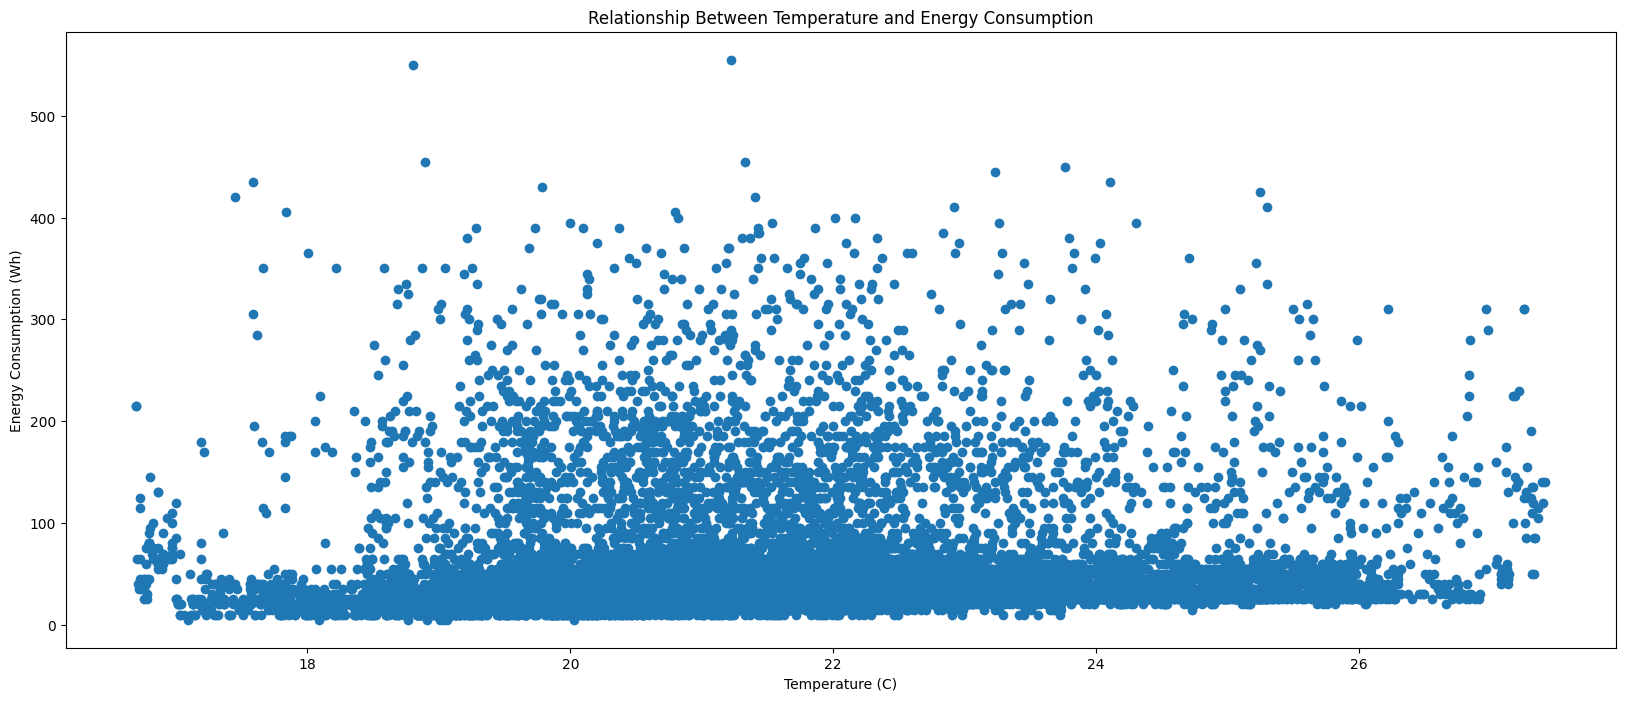

In [ ]:
# Chart 1 comparison between energy and temperature 

temp_cols = ['Kitchen_Temp', 'Living_Room_Temp', 'Laundry_Room_Temp']
energy_cols = ['Appliances', 'Light_Energy']
df_temp = df_new[temp_cols].mean(axis=1)
df_energy = df_new[energy_cols].mean(axis=1)
df_energy.head(10)

#Graph

plt.figure(figsize=(20,8))
plt.scatter(df_temp, df_energy)
plt.xlabel('Temperature (C)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Relationship Between Temperature and Energy Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

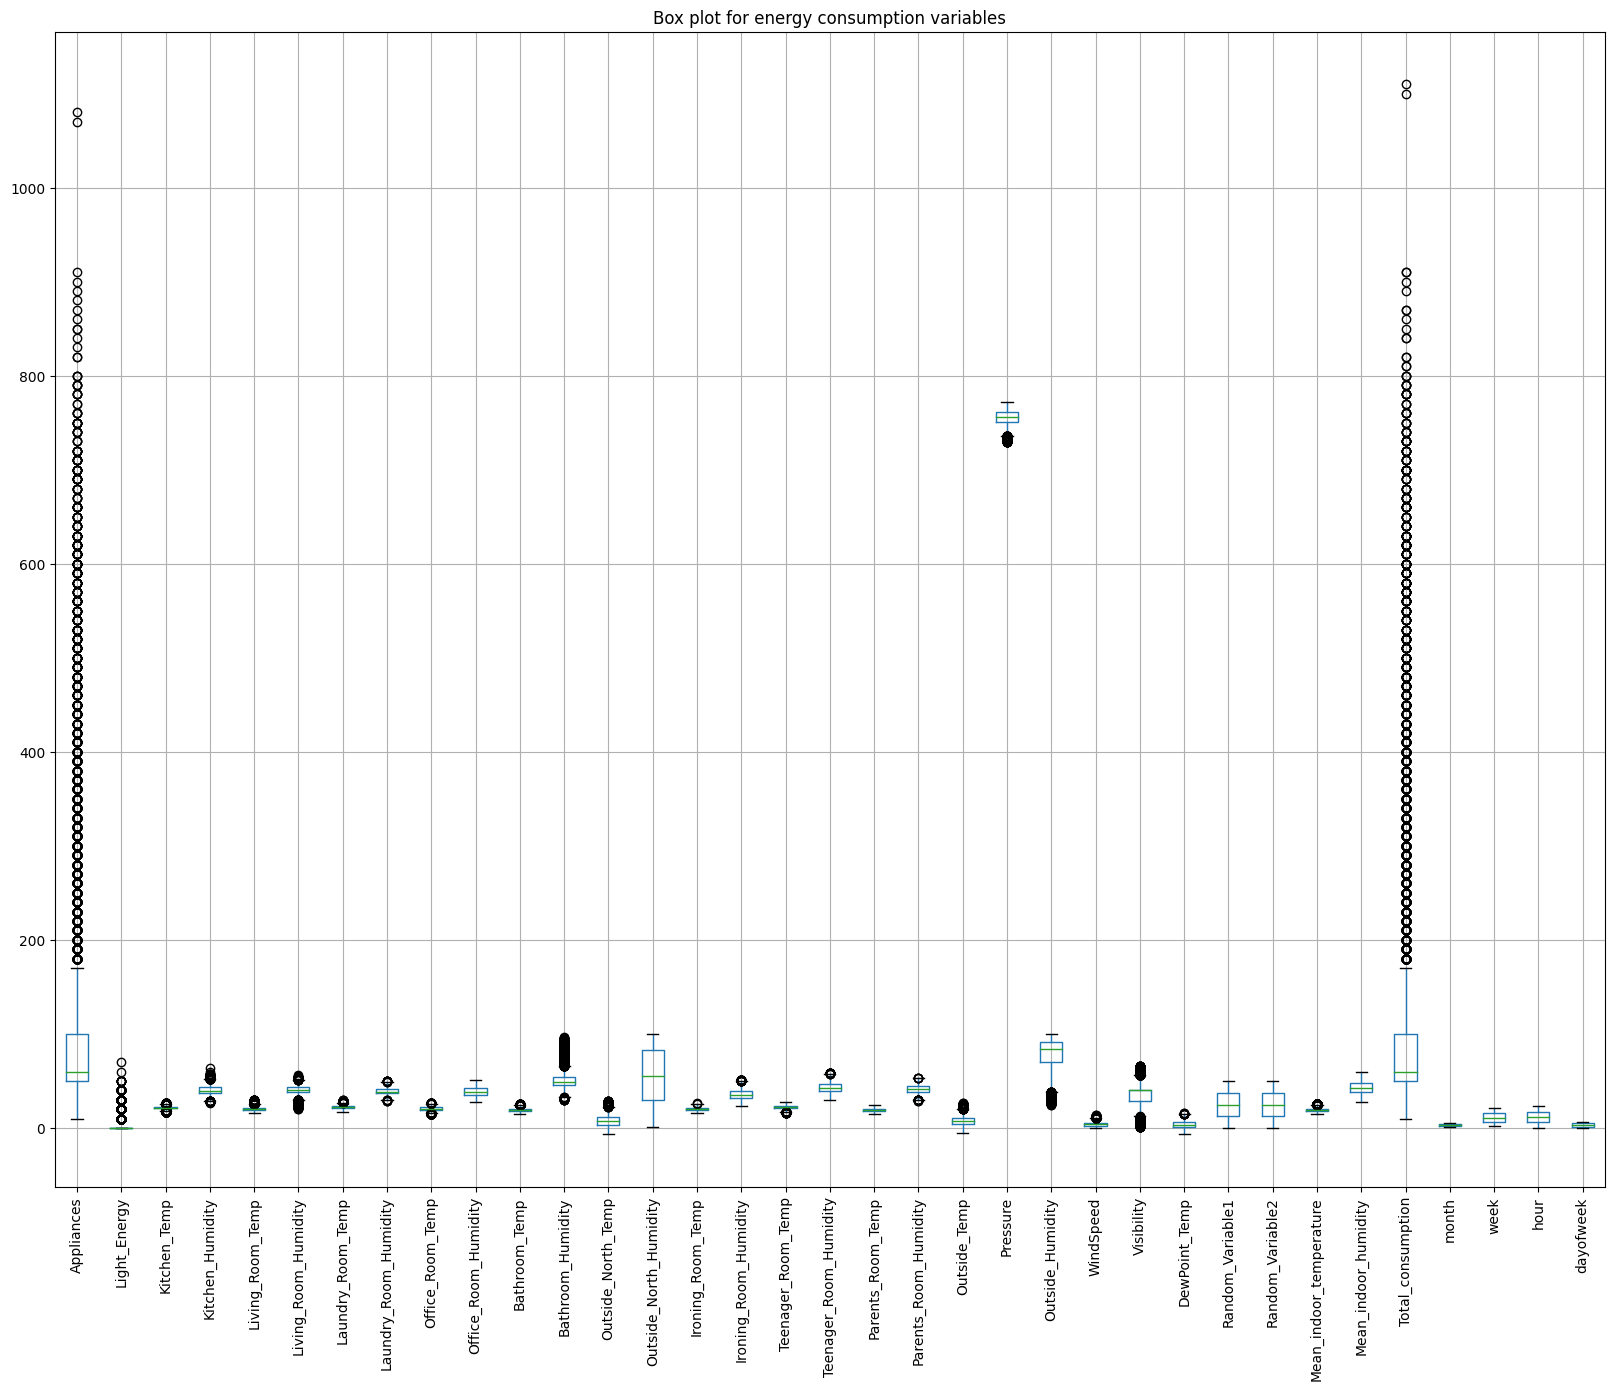

In [ ]:
# Chart - 2 visualization code
# Chart 2 Appliances that consumes more energy

appliances = df_new[['Appliances', 'Light_Energy', 'Kitchen_Temp', 'Kitchen_Humidity', 'Living_Room_Temp', 'Living_Room_Humidity', 'Laundry_Room_Temp', 'Laundry_Room_Humidity', 'Office_Room_Temp', 'Office_Room_Humidity', 'Bathroom_Temp',	'Bathroom_Humidity',	'Outside_North_Temp',	'Outside_North_Humidity',	'Ironing_Room_Temp',	'Ironing_Room_Humidity',	'Teenager_Room_Temp',	'Teenager_Room_Humidity',	'Parents_Room_Temp',	'Parents_Room_Humidity']]
average_consumption = appliances.mean()
sorted_appliances = average_consumption.sort_values(ascending=False)
sorted_appliances


#Graph

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
df_new.boxplot(rot=90)
plt.title('Box plot for energy consumption variables')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

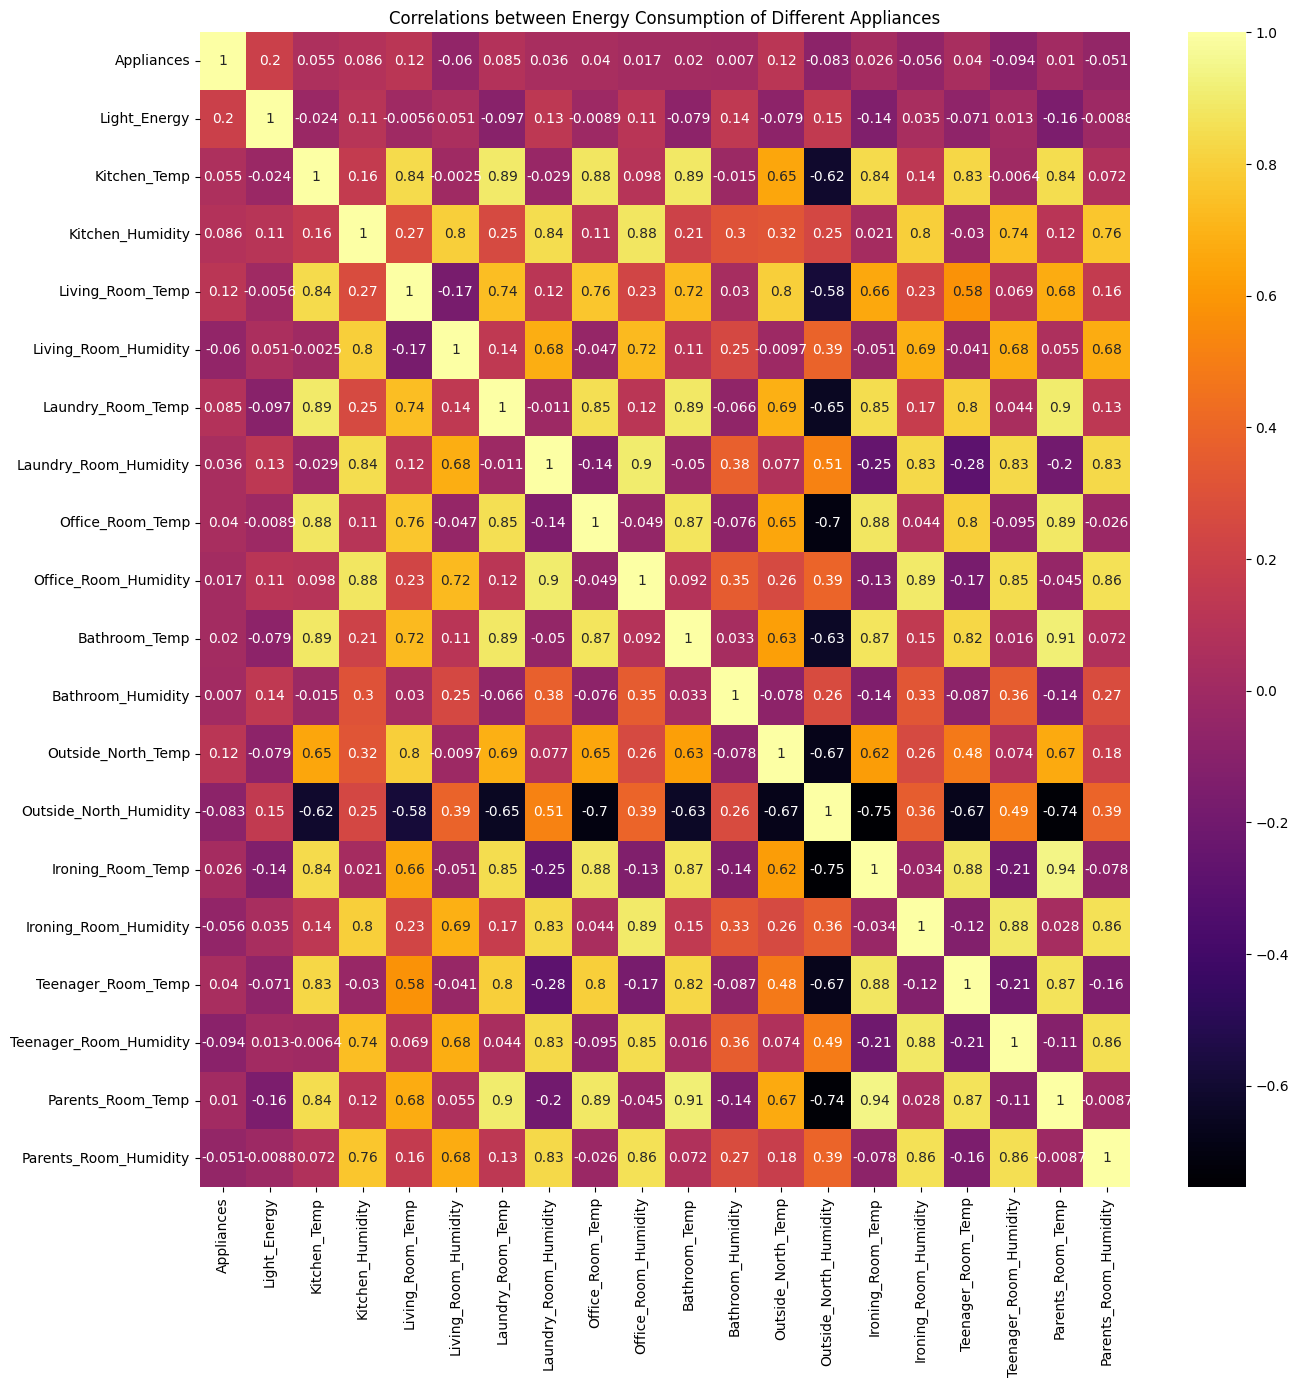

In [ ]:
# Chart - 3 visualization code
# Chart 3 Corelation matrix between energy consumption of different appliances

appliance_cols = ['Appliances', 'Light_Energy', 'Kitchen_Temp', 'Kitchen_Humidity', 'Living_Room_Temp', 'Living_Room_Humidity', 'Laundry_Room_Temp', 'Laundry_Room_Humidity', 'Office_Room_Temp', 'Office_Room_Humidity', 'Bathroom_Temp',	'Bathroom_Humidity',	'Outside_North_Temp',	'Outside_North_Humidity',	'Ironing_Room_Temp',	'Ironing_Room_Humidity',	'Teenager_Room_Temp',	'Teenager_Room_Humidity',	'Parents_Room_Temp',	'Parents_Room_Humidity']
corr_matrix = df_new[appliance_cols].corr()

# Graph
plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='inferno', annot=True)
plt.title('Correlations between Energy Consumption of Different Appliances')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

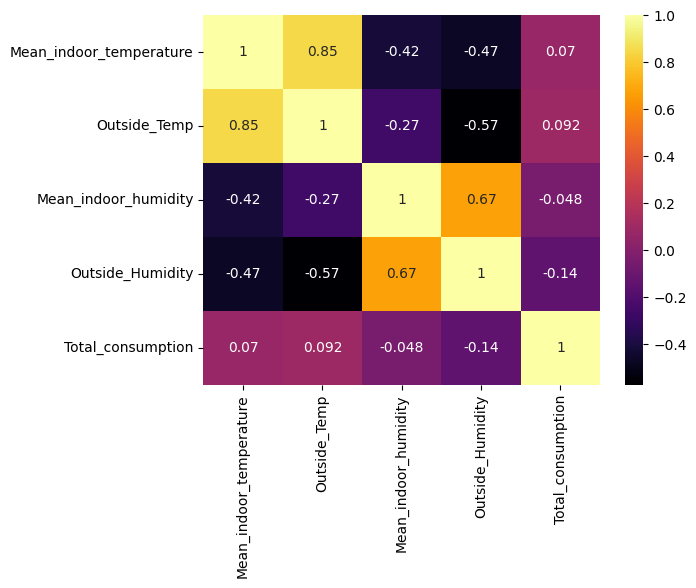

In [ ]:
# Chart - 4 visualization code
#Chart 4 co-relation between mean temperatures and humidity with total consumption

col_list4corr = df_new[['Mean_indoor_temperature','Outside_Temp','Mean_indoor_humidity','Outside_Humidity','Total_consumption']]
corr_matrix = col_list4corr.corr()

sns.heatmap(corr_matrix, cmap='inferno', annot=True)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

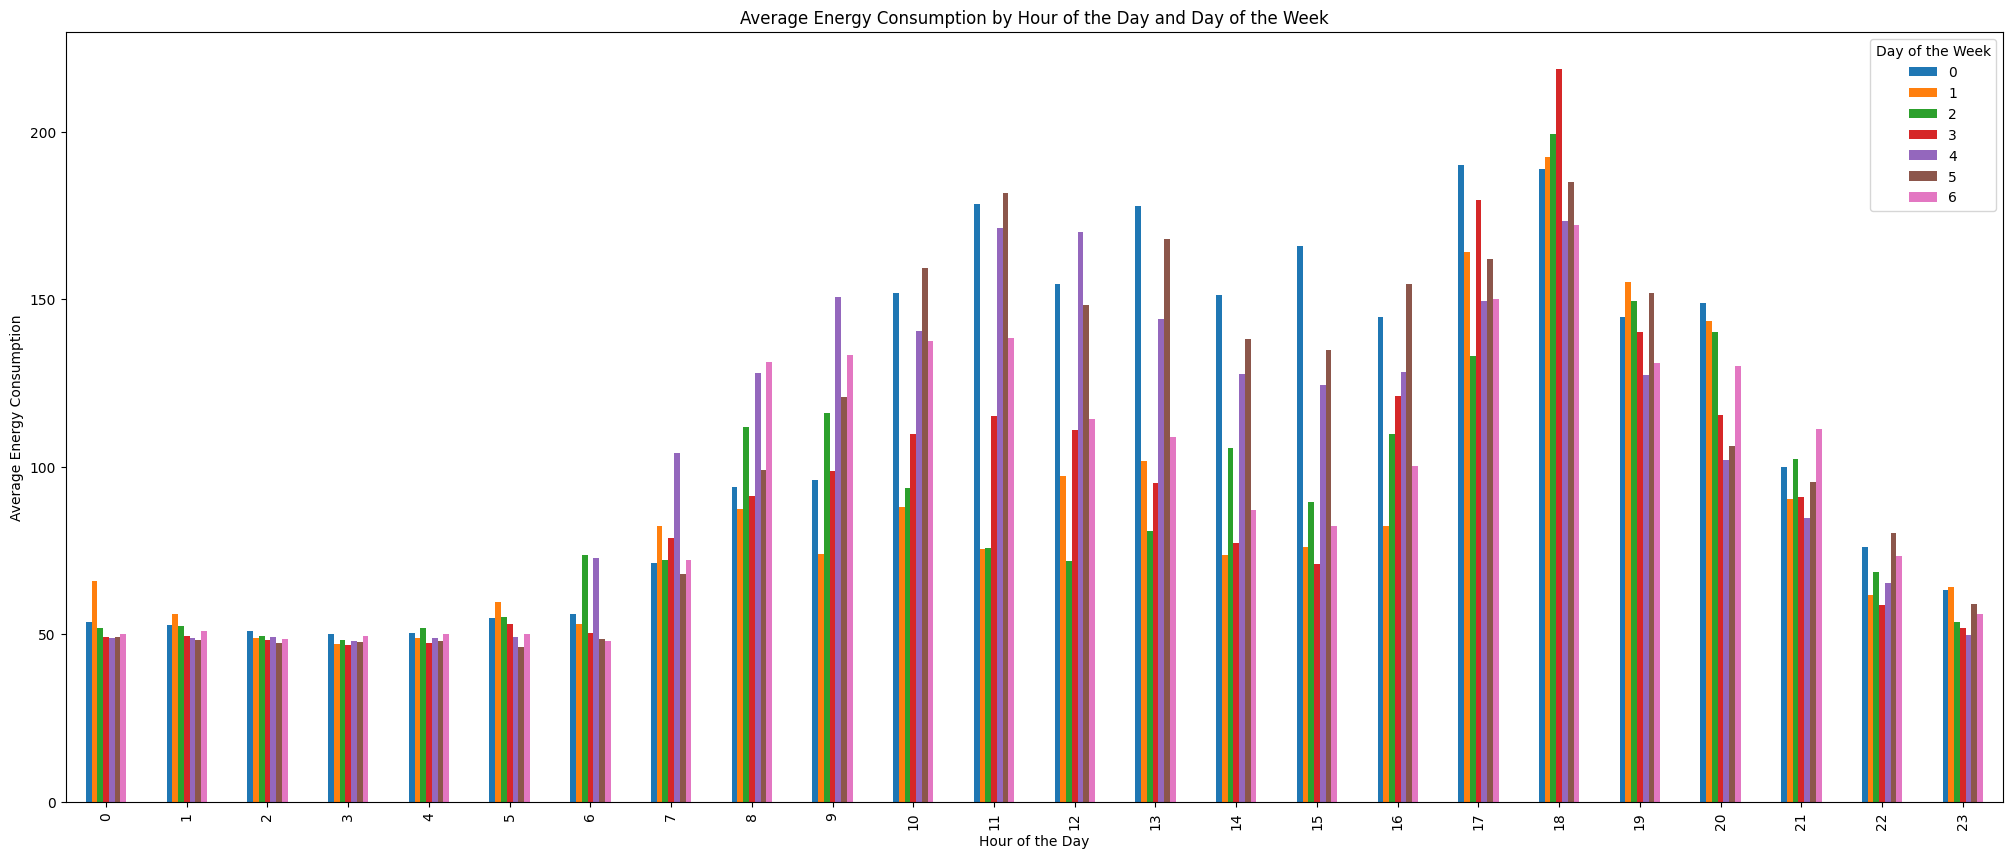

In [ ]:
# Chart - 5 visualization code
#Chart 5 Calculate the average energy consumption for each hour of the day, broken down by the day of the week
avg_energy = df_new.groupby(['hour', 'dayofweek'])['Appliances'].mean().unstack()
avg_energy

#graph

avg_energy.plot(kind='bar', figsize=(25,10))

plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

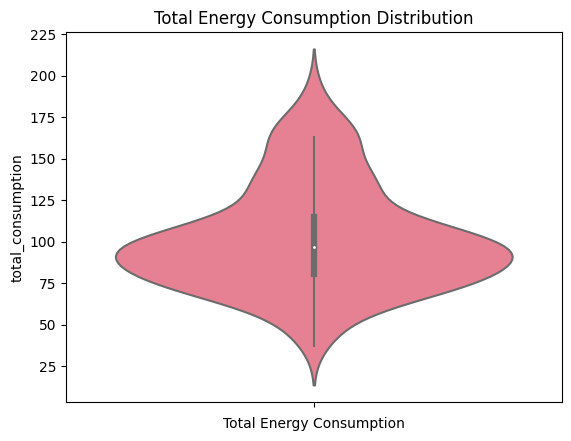

In [ ]:
# Chart - 6 visualization code
#Chart 6 Total energy consumption of building for each date
total_energy = df_new.groupby('date1').agg({'Appliances':'mean', 'Light_Energy':'mean'})
total_energy['total_consumption'] = total_energy[['Appliances', 'Light_Energy']].sum(axis=1)
total_energy.head(10)


#Graph

fig = px.violin(total_energy, x='total_consumption')
fig.update_layout(title="Total Energy Consumption Distribution", xaxis_title="Total Energy Consumption")
fig.show()

#Graph 2

sns.violinplot(y="total_consumption", data=total_energy, palette="husl", box=True)
plt.title("Total Energy Consumption Distribution")
plt.xlabel("Total Energy Consumption")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

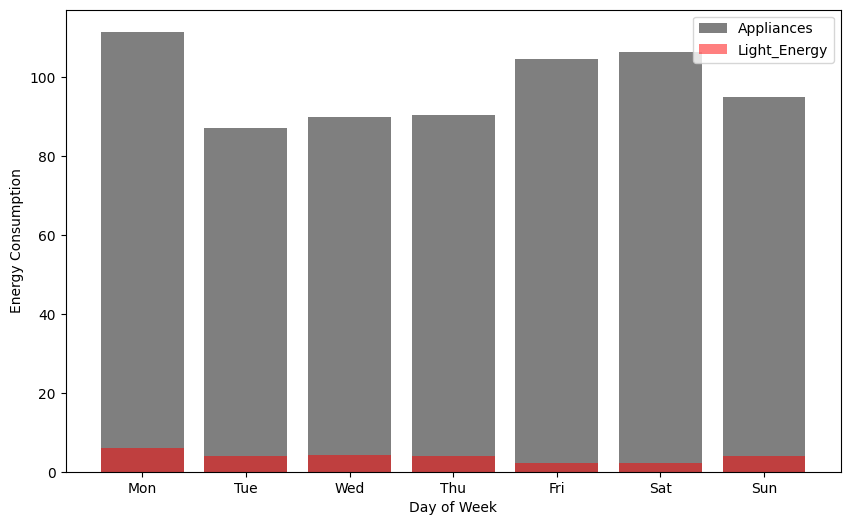

In [ ]:
# Chart - 7 visualization code
#Chart 7 Energy consumption on weekdays and weekend

energy_wd_wknd = df_new.groupby('dayofweek')['Appliances', 'Light_Energy'].mean()
energy_wd_wknd


#Graph

plt.figure(figsize=(10,6))
plt.bar(energy_wd_wknd.index, energy_wd_wknd['Appliances'], color='black', alpha= 0.5, label='Appliances')
plt.bar(energy_wd_wknd.index, energy_wd_wknd['Light_Energy'], color='red', alpha= 0.5, label='Light_Energy')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

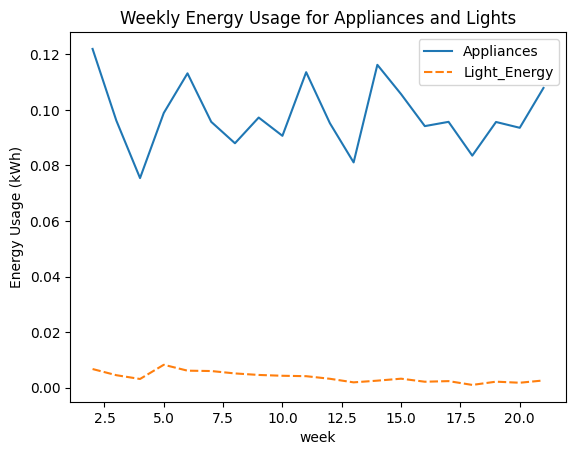

In [ ]:
# Chart - 8 visualization code
#Chart 8 Energy consumption per week

energy_per_week = df_new.groupby("week").agg({'Appliances': 'mean', 'Light_Energy': 'mean'}) /1000
energy_per_week


#Graph

sns.lineplot(data=energy_per_week)
plt.title('Weekly Energy Usage for Appliances and Lights')
plt.xlabel('week')
plt.ylabel('Energy Usage (kWh)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

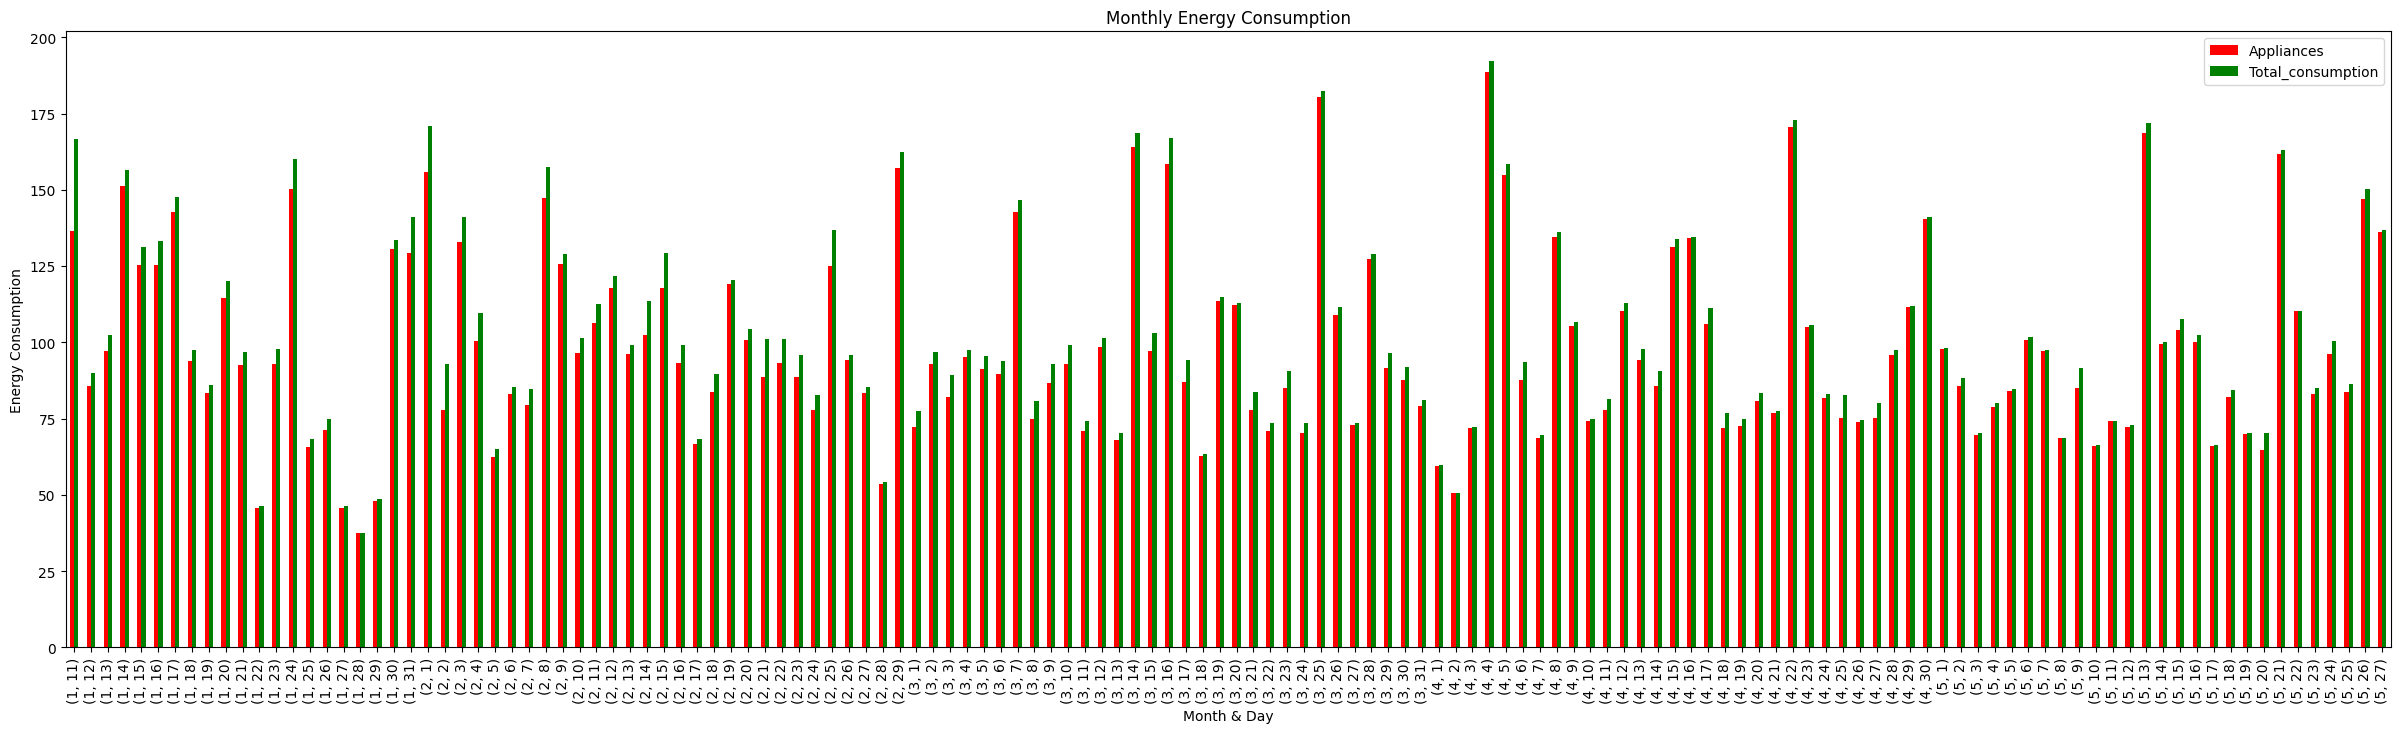

In [ ]:
# Chart - 9 visualization code
#Chart 10 Energy consumption for all 4 months

Monthly_consumption = df_new.groupby([df_new['Date'].dt.month, df_new['Date'].dt.day]).agg({'Appliances': 'mean', 'Total_consumption': 'mean'})
Monthly_consumption

Monthly_consumption.index = Monthly_consumption.index.set_names(['month', 'day'])
Monthly_consumption


#Graph

Monthly_consumption.plot.bar(figsize=(30,8),color=['red', 'green',])
plt.title('Monthly Energy Consumption')
plt.xlabel('Month & Day')
plt.ylabel('Energy Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

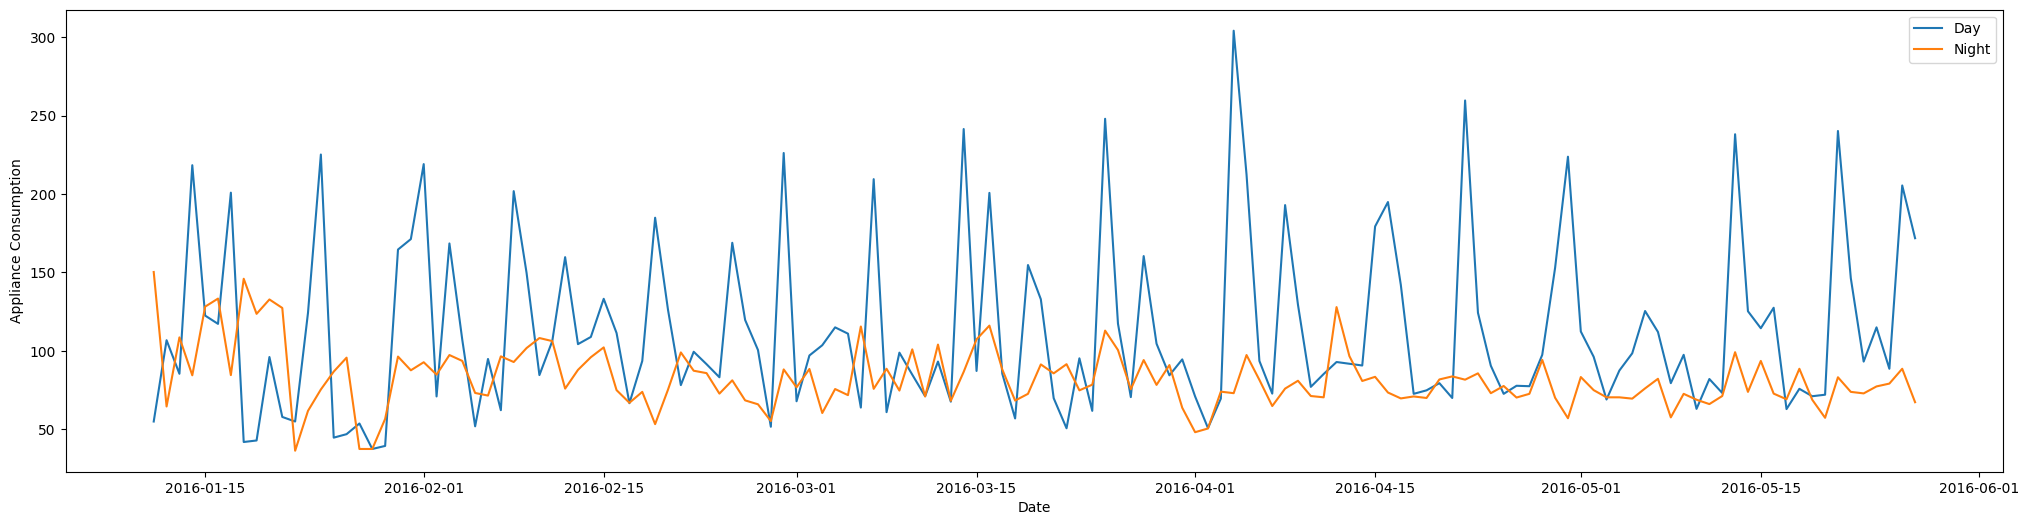

In [ ]:
# Chart - 10 visualization code
# Chart 12 Calculate Mean Energy Consumption for Appliances and Lights

d_n_energy_con= df_new.groupby(['date1', 'Day/Night']).agg({'Appliances': 'mean', 'Light_Energy': 'mean'}).reset_index()
d_n_energy_con


#Graph

day_data = d_n_energy_con[d_n_energy_con['Day/Night'] == 'Day']
night_data = d_n_energy_con[d_n_energy_con['Day/Night'] == 'Night']
plt.figure(figsize=(25, 6))
plt.plot(day_data['date1'], day_data['Appliances'], label='Day')
plt.plot(night_data['date1'], night_data['Appliances'], label='Night')
plt.xlabel('Date')
plt.ylabel('Appliance Consumption')
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

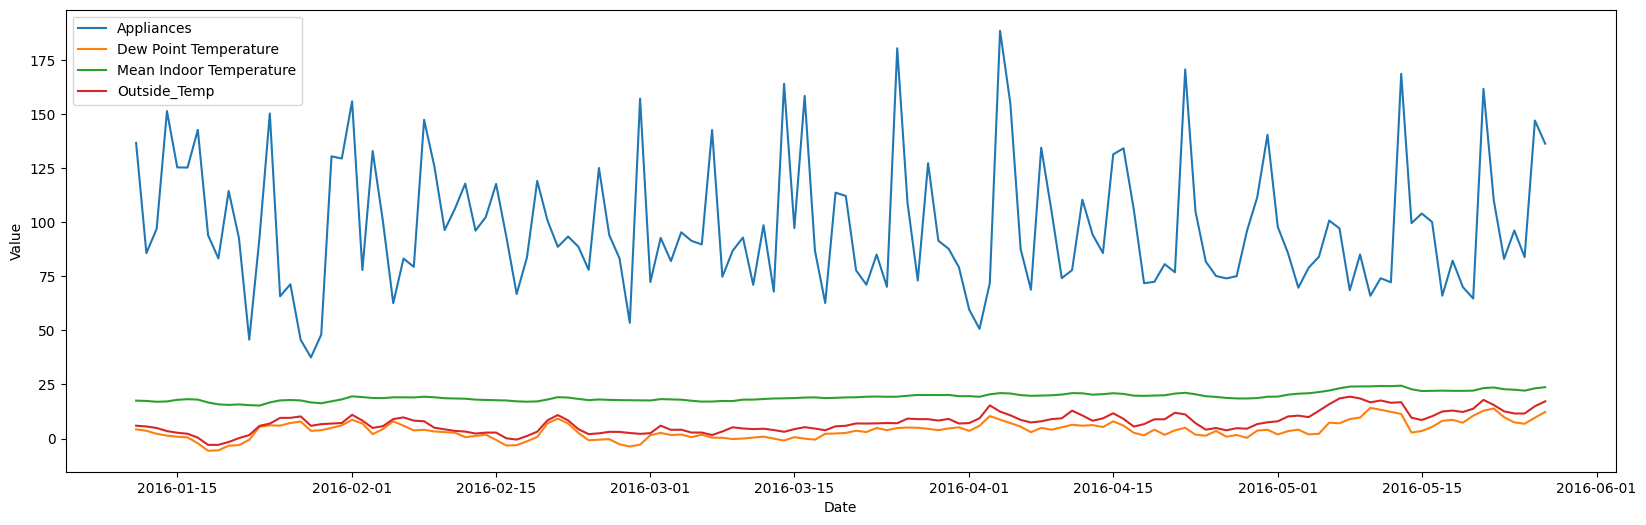

In [ ]:
# Chart - 11 visualization code
#compare the average energy consumption of appliances with three different temperature variables
testdf= df_new.groupby('date1').agg({'DewPoint_Temp':'mean','Appliances':'mean','Outside_Temp':'mean','Mean_indoor_temperature':'mean'})
testdf.head(10)

#Graph


plt.figure(figsize=(20, 6))

plt.plot(testdf.index, testdf['Appliances'], label='Appliances')

plt.plot(testdf.index, testdf['DewPoint_Temp'], label='Dew Point Temperature')


plt.plot(testdf.index, testdf['Mean_indoor_temperature'], label='Mean Indoor Temperature')


plt.plot(testdf.index, testdf['Outside_Temp'], label='Outside_Temp')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

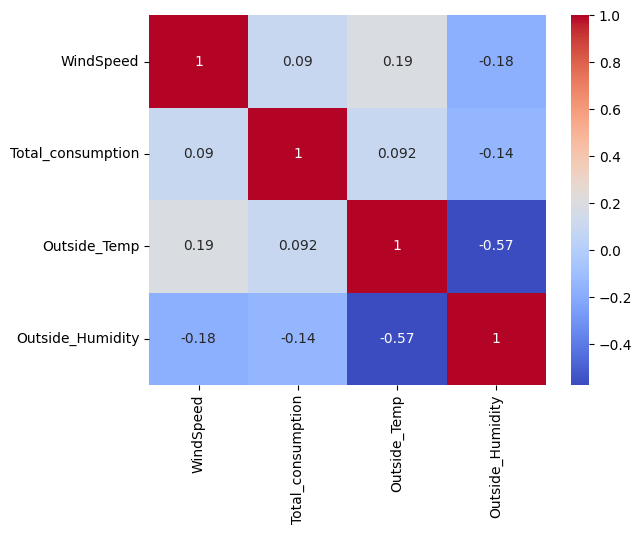

In [ ]:
# Correlation Heatmap visualization code
#Chart 14 Calculating Correlation Heatmap Between Wind Speed, Total Energy Consumption, Outside Temperature, and Outside Humidity.

ws_energy_cons = df_new[['WindSpeed', 'Total_consumption', 'Outside_Temp', 'Outside_Humidity']]
corr_ws_energy = ws_energy_cons.corr()
corr_ws_energy

sns.heatmap(corr_ws_energy, annot=True, cmap='coolwarm')
plt.show

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

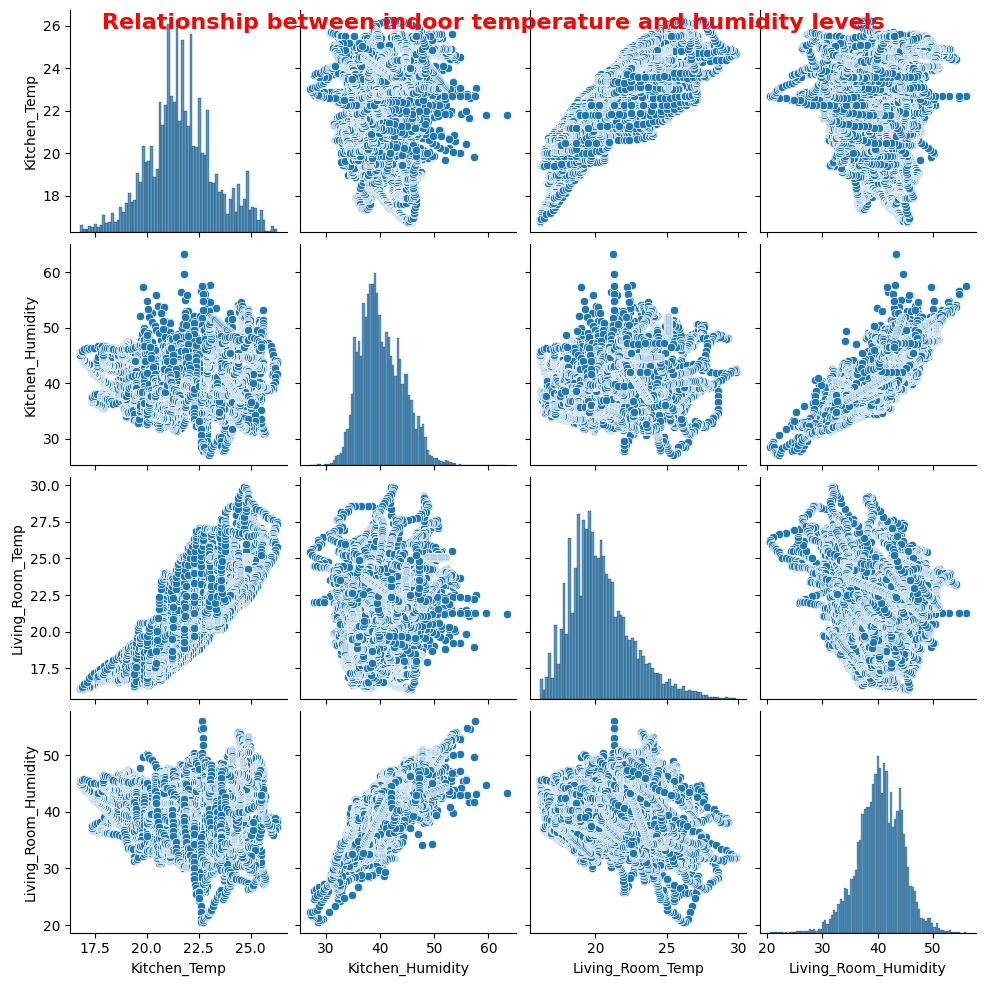

In [ ]:
# Pair Plot visualization code
#Chart 15 Relationship between indoor temperature and humidity levels

columns_taken = ['Kitchen_Temp', 'Kitchen_Humidity', 'Living_Room_Temp', 'Living_Room_Humidity']


#Graph

sns.pairplot(df_new[columns_taken])
plt.suptitle('Relationship between indoor temperature and humidity levels', fontsize=16, fontweight ='bold', color = 'Red')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null** :- There is no change in total energy consumption bet weekdays and weekend

Alternate :- There is higher total energy consumption on weekends as compared to weekdays.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

data_weekday = df_new[df_new['dayofweek'] <= 5][['Total_consumption']]
data_weekend = df_new[df_new['dayofweek'] > 5][['Total_consumption']]

#Statistics Test and P-value
t_stat, p_val = stats.ttest_ind(data_weekday, data_weekend, equal_var=True)

print('T-Statistics value', t_stat)
print("P-Value", p_val)

T-Statistics value [1.37855865]
P-Value [0.1680465]


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis**: Outside_Temp and Mean_indoor_temperature do not have a significant effect on 'Total_consumption'

**Alternate hypothesis**: Outside_Temp and Mean_indoor_temperature have a significant effect on 'Total_consumption'

#### 2. Perform an appropriate statistical test.

In [ ]:
x = df_new[['Outside_Temp', 'Mean_indoor_temperature']]
y = df_new['Total_consumption']

x = sm.add_constant(x) # adding a constant intercept term

model = sm.OLS(y, x).fit()
t_values = model.tvalues
p_values = model.pvalues
print('p value',p_values)

p value const                      3.064630e-23
Outside_Temp               1.549144e-17
Mean_indoor_temperature    4.532208e-02
dtype: float64


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null**:- There is no significant difference in the mean energy consumption for appliances between day and night.

Alternate:- There is a significant difference in the mean energy consumption for appliances between day and night.

that basically means time of day has an effect on energy consumption for appliances.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
X = d_n_energy_con['Day/Night'].replace({'Day': 0, 'Night': 1})
y = d_n_energy_con['Appliances']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

p_value = model.pvalues[1]
t_values = model.tvalues[1]
print("p-value for Day/Night variable:", p_value)
print("T-statistics for Day/Night variable:", t_values)

p-value for Day/Night variable: 4.380856505257306e-09
T-statistics for Day/Night variable: -6.064342058832211


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#before handling missing values we create a new dataframe for this section to avoid confusions

df_FE = df.copy()
df_FE.head(1)

# Handling Missing Values & Missing Value Imputation

nan_count_FE = df_FE.isna().sum(axis = 0)
nan_count_FE

Date                      0
Appliances                0
Light_Energy              0
Kitchen_Temp              0
Kitchen_Humidity          0
Living_Room_Temp          0
Living_Room_Humidity      0
Laundry_Room_Temp         0
Laundry_Room_Humidity     0
Office_Room_Temp          0
Office_Room_Humidity      0
Bathroom_Temp             0
Bathroom_Humidity         0
Outside_North_Temp        0
Outside_North_Humidity    0
Ironing_Room_Temp         0
Ironing_Room_Humidity     0
Teenager_Room_Temp        0
Teenager_Room_Humidity    0
Parents_Room_Temp         0
Parents_Room_Humidity     0
Outside_Temp              0
Pressure                  0
Outside_Humidity          0
WindSpeed                 0
Visibility                0
DewPoint_Temp             0
Random_Variable1          0
Random_Variable2          0
dtype: int64

As we can see there is no missing values in this dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

<Axes: >

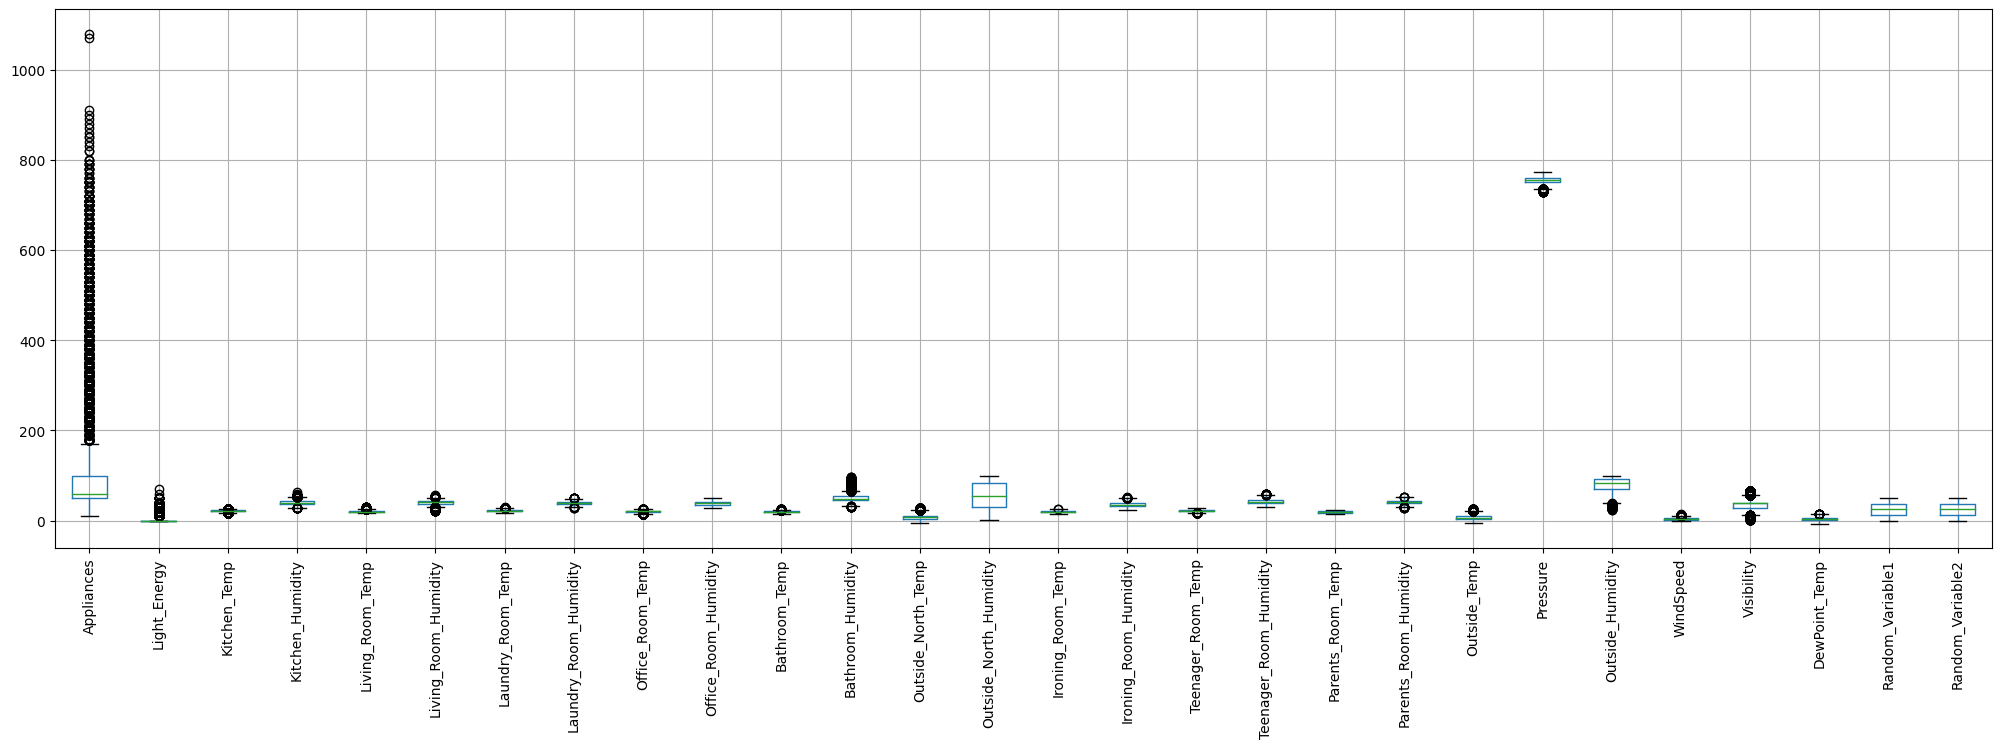

In [ ]:
# Handling Outliers & Outlier treatments
df_FE.boxplot(figsize=(25,7),rot=90)


In [ ]:
while True:
  q1 = df_FE['Appliances'].quantile(0.25)
  q3 = df_FE['Appliances'].quantile(0.75)
  iqr = q3 - q1
  
  upper_bound = q3 + 1.5 * iqr
  lower_bound = q1 - 1.5 * iqr

  outliers = df_FE[(df_FE['Appliances'] > upper_bound) | (df_FE['Appliances'] < lower_bound)]
 

  df_FE=df_FE.drop(outliers.index)
  if outliers.empty:
    break
df_FE.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16740 entries, 0 to 19731
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    16740 non-null  object 
 1   Appliances              16740 non-null  int64  
 2   Light_Energy            16740 non-null  int64  
 3   Kitchen_Temp            16740 non-null  float64
 4   Kitchen_Humidity        16740 non-null  float64
 5   Living_Room_Temp        16740 non-null  float64
 6   Living_Room_Humidity    16740 non-null  float64
 7   Laundry_Room_Temp       16740 non-null  float64
 8   Laundry_Room_Humidity   16740 non-null  float64
 9   Office_Room_Temp        16740 non-null  float64
 10  Office_Room_Humidity    16740 non-null  float64
 11  Bathroom_Temp           16740 non-null  float64
 12  Bathroom_Humidity       16740 non-null  float64
 13  Outside_North_Temp      16740 non-null  float64
 14  Outside_North_Humidity  16740 non-null

<Axes: >

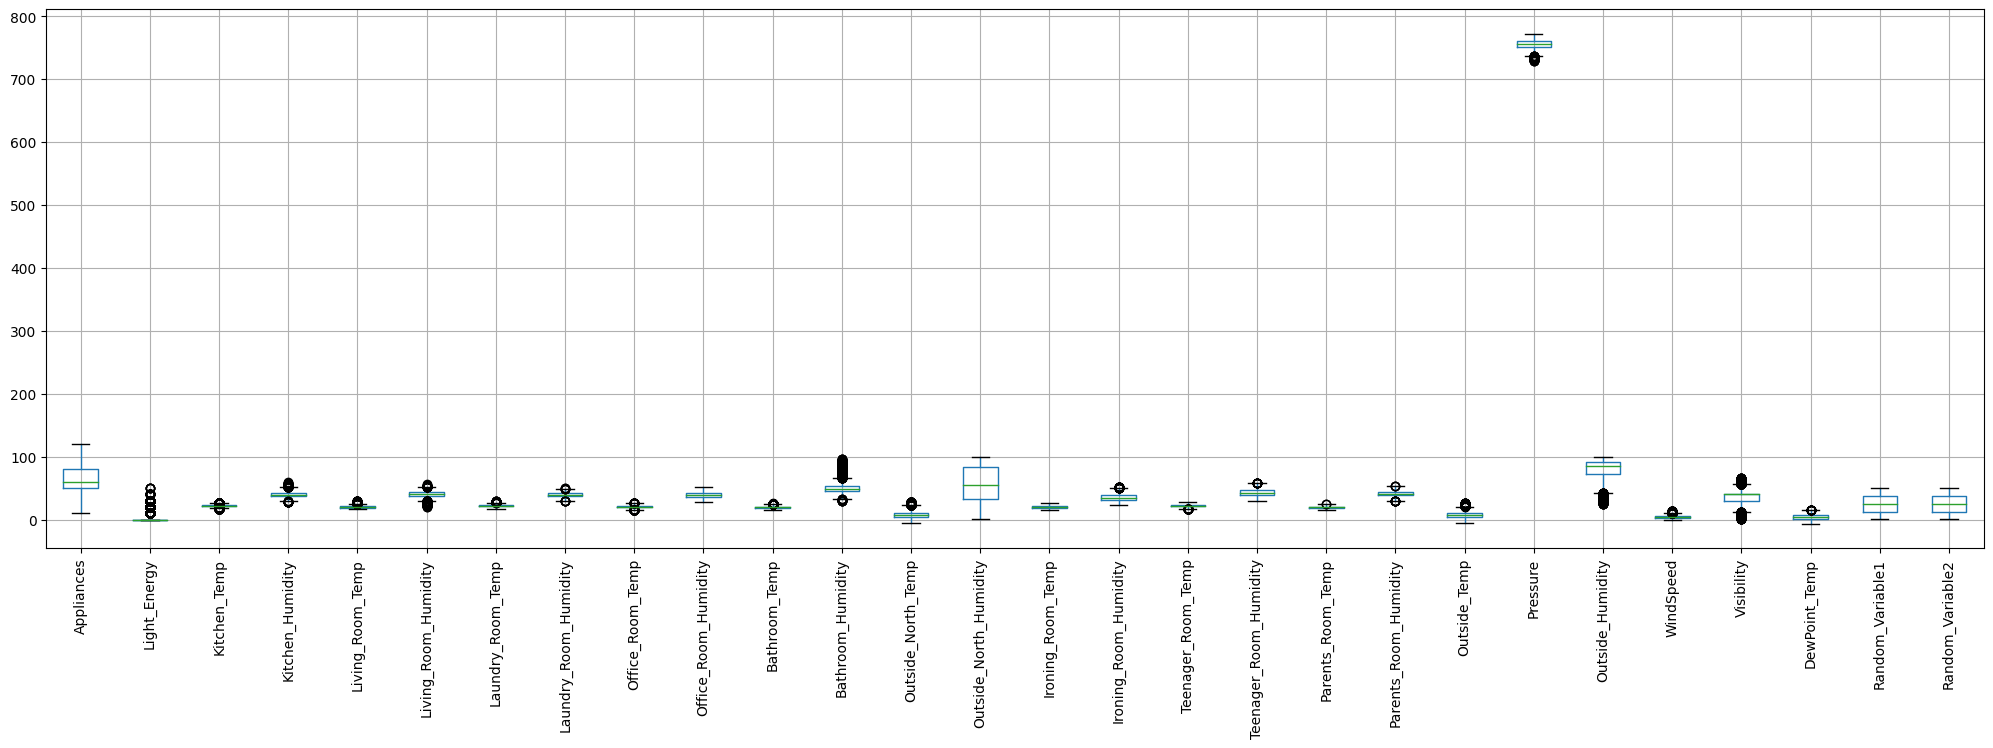

In [ ]:
df_FE.boxplot(figsize=(25,7),rot=90)

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used IQR method to remove the outliers

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
non_numeric_cols = df_FE.select_dtypes(exclude='number').columns.tolist()
numeric_cols = df_FE.select_dtypes(include='number').columns.tolist()

non_numeric_cols


#technique used for encoding categorical columns


['Date']

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#First we rename the columns accordingly to get better understanding

df_FE = df_FE.rename(columns={
    "date": "Date",
    "lights": "Light_Energy",
    "T1": "Kitchen_Temp",
    "RH_1": "Kitchen_Humidity",
    "T2": "Living_Room_Temp",
    "RH_2": "Living_Room_Humidity",
    "T3": "Laundry_Room_Temp",
    "RH_3": "Laundry_Room_Humidity",
    "T4": "Office_Room_Temp",
    "RH_4": "Office_Room_Humidity",
    "T5": "Bathroom_Temp",
    "RH_5": "Bathroom_Humidity",
    "T6": "Outside_North_Temp",
    "RH_6": "Outside_North_Humidity",
    "T7": "Ironing_Room_Temp",
    "RH_7": "Ironing_Room_Humidity",
    "T8": "Teenager_Room_Temp",
    "RH_8": "Teenager_Room_Humidity",
    "T9": "Parents_Room_Temp",
    "RH_9": "Parents_Room_Humidity",
    "T_out": "Outside_Temp",
    "Press_mm_hg": "Pressure",
    "RH_out": "Outside_Humidity",
    "Windspeed": "WindSpeed",
    "Visibility": "Visibility",
    "Tdewpoint": "DewPoint_Temp",
    "rv1": "Random_Variable1",
    "rv2": "Random_Variable2",
})

df_FE.head(1)

'''
#Added "5" New columns
df_FE['Mean_indoor_temperature'] = df_FE[['Kitchen_Temp', 'Living_Room_Temp', 'Laundry_Room_Temp', 'Office_Room_Temp', 'Bathroom_Temp', 'Outside_North_Temp', 'Ironing_Room_Temp', 'Teenager_Room_Temp', 'Parents_Room_Temp']].mean(axis=1)

df_FE['Mean_outdoor_temperature'] = df_FE['Outside_Temp']

df_FE['Mean_indoor_humidity'] = df_FE[['Kitchen_Humidity', 'Living_Room_Humidity', 'Laundry_Room_Humidity', 'Office_Room_Humidity', 'Bathroom_Humidity', 'Outside_North_Humidity', 'Ironing_Room_Humidity', 'Teenager_Room_Humidity', 'Parents_Room_Humidity']].mean(axis=1)

df_FE['Mean_outdoor_humidity'] = df_FE['Outside_Humidity']
df_FE['Total_consumption'] = df_FE[['Appliances', 'Light_Energy']].sum(axis=1)


#Extracted Date, time, week, hour, month, day_of_week/weekend
df_FE['date']=pd.to_datetime(df["date"],format='%Y-%m-%d %H:%M:%S')
df_FE['date'] =  pd.to_datetime(df['date'],errors='ignore')
df_FE['date1'] =(df_FE['date']).dt.date
df_FE['time'] =df_FE['date'].dt.time
df_FE['day_name'] = df_FE['date'].dt.day_name()
df_FE['month'] = df_FE['date'].dt.month
df_FE['week'] = df_FE['date'].dt.week
df_FE['hour'] = df_FE['date'].dt.hour
df_FE['dayofweek'] = df_FE['date'].dt.dayofweek
df_FE['Day/Night'] = df_FE['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')


#defined weather the day is a weekday or weekend
df_FE['dayofweek/weekend']=''
for i in range(len(df_FE)):
    if df_FE['dayofweek'][i] >= 5:
        df_FE['dayofweek/weekend'][i] = "weekend"
    else:
        df_FE['dayofweek/weekend'][i] = "dayofweek"

df_FE.head(1) '''

df_FE.head(1)

,Date,Appliances,Light_Energy,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,Office_Room_Humidity,Bathroom_Temp,Bathroom_Humidity,Outside_North_Temp,Outside_North_Humidity,Ironing_Room_Temp,Ironing_Room_Humidity,Teenager_Room_Temp,Teenager_Room_Humidity,Parents_Room_Temp,Parents_Room_Humidity,Outside_Temp,Pressure,Outside_Humidity,WindSpeed,Visibility,DewPoint_Temp,Random_Variable1,Random_Variable2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.9,17.033333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
correlation_matrix=df_FE.corr()

threshold = 0.5


correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

{'Outside_Humidity', 'Outside_Temp'}

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

<Axes: xlabel='Appliances', ylabel='Density'>

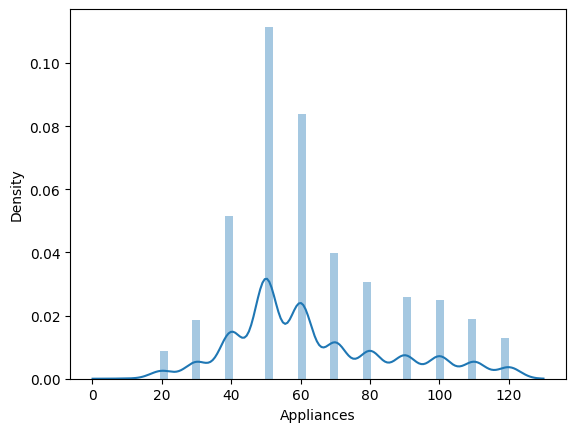

In [ ]:
# Transform Your data
sns.distplot(df_FE['Appliances'])

<Axes: xlabel='Appliances_log', ylabel='Density'>

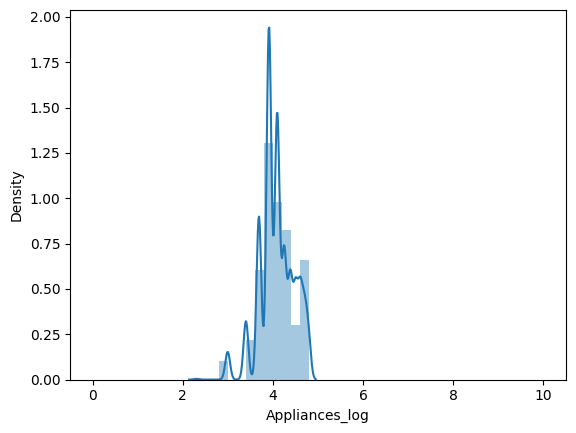

In [ ]:
df_FE['Appliances_log']=np.log(df_FE['Appliances'])
df_FE.head(5)
sns.distplot(df_FE['Appliances_log'], bins=50, hist_kws={'range': (0, 10)})


In [ ]:
df_FE.head(1)

,Date,Appliances,Light_Energy,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,Office_Room_Humidity,Bathroom_Temp,Bathroom_Humidity,Outside_North_Temp,Outside_North_Humidity,Ironing_Room_Temp,Ironing_Room_Humidity,Teenager_Room_Temp,Teenager_Room_Humidity,Parents_Room_Temp,Parents_Room_Humidity,Outside_Temp,Pressure,Outside_Humidity,WindSpeed,Visibility,DewPoint_Temp,Random_Variable1,Random_Variable2,Appliances_log
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.9,17.033333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433,4.094345


### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df_FE.drop(['Date', 'Appliances','Light_Energy', 'Appliances_log','Random_Variable1','Random_Variable2','Outside_Humidity'], axis=1)
y = df_FE['Appliances_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### What data splitting ratio have you used and why? 


The code uses a 80:20 ratio to split the data into training and testing sets, respectively. This means that 80% of the data is used for training the model, while 20% of the data is used for testing the model.

The choice of the ratio depends on various factors such as the size of the dataset, the complexity of the model, and the amount of available computational resources. In general, a larger training set will result in a better model, but a smaller testing set will result in a higher variance in the performance metrics. An 80:20 ratio is a good choice that balances the trade-off between having enough data to train the model and having enough data to evaluate the model's performance.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
print('Number of instances in X_train:', len(X_train))
print('Number of instances in X_test:', len(X_test))
print('Number of instances in y_train:', len(y_train))
print('Number of instances in y_test:', len(y_test))

Number of instances in X_train: 13392
Number of instances in X_test: 3348
Number of instances in y_train: 13392
Number of instances in y_test: 3348


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 9. Data Scaling

In [ ]:
# Scaling your data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?


The method used to scale the data is Min-Max scaling or normalization, which scales the data to a range between 0 and 1. 

This method was used because it preserves the distribution of the data and maintains the relationships between the features. Additionally, many machine learning algorithms perform better with scaled data, especially those that use distance-based metrics or optimization functions. The MinMaxScaler function from Scikit-learn was used to perform the scaling.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
#Ridge

ridge = Ridge()

# Fit the Ridge model 
ridge.fit(X_train_scaled, y_train)

# Predict  values for the test data
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model using metrics
mse_r = mean_squared_error(y_test, y_pred)
r2_r = r2_score(y_test, y_pred)

print("Ridge Mean Squared Error:",mse_r)
print("Ridge R^2 Score:",r2_r)



#Lasso

lasso = Lasso()

# Fit the Lasso model on the training data
lasso.fit(X_train_scaled, y_train)

# Predict the target values for the test data
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model using metrics
mse_l = mean_squared_error(y_test, y_pred)
r2_l = r2_score(y_test, y_pred)

print("Lasso Mean Squared Error:",mse_l)
print("Lasso R^2 Score:",r2_l)


Ridge Mean Squared Error: 0.09125724656016848
Ridge R^2 Score: 0.32429959034156164
Lasso Mean Squared Error: 0.1350591394653481
Lasso R^2 Score: -2.486711761440219e-05


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

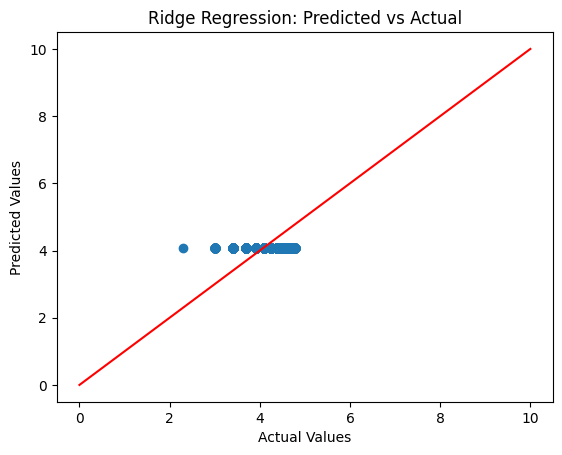

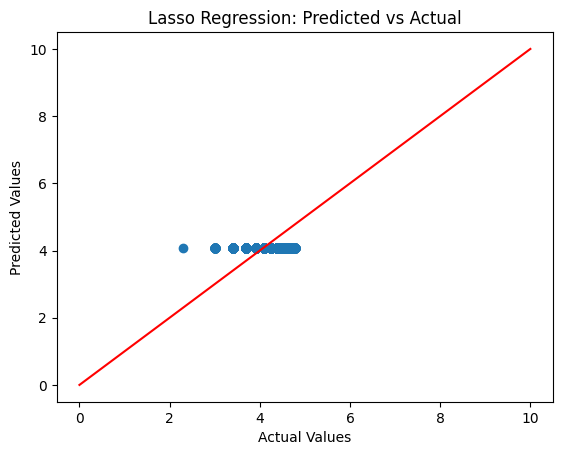

In [ ]:
# Visualizing evaluation Metric Score chart
#Ridge

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, 10, 100), np.linspace(0, 10, 100), color='red')
plt.title("Ridge Regression: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#Lasso

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, 10, 100), np.linspace(0, 10, 100), color='red')
plt.title("Lasso Regression: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

ridge_params = {'alpha': [0.001, 0.01,0.1,0.5, 1]}
lasso_params = {'alpha': [0.0001, 0.001,0.01, 0.1]}

# Create Ridge and Lasso regression objects
ridge = Ridge()
lasso = Lasso()

# Create GridSearchCV objects
ridge_cv = GridSearchCV(ridge, param_grid=ridge_params, scoring='neg_mean_squared_error')
lasso_cv = GridSearchCV(lasso, param_grid=lasso_params, scoring='neg_mean_squared_error')

# Fit the models using GridSearchCV
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)

# Get the best hyperparameters and fit the models again using the best hyperparameters
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha']).fit(X_train_scaled, y_train)
lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha']).fit(X_train_scaled, y_train)

# Predict  values for the test data using the best models
y_pred_ridge = ridge_best.predict(X_test_scaled)
y_pred_lasso = lasso_best.predict(X_test_scaled)

# Evaluate 
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics for both models
print("Ridge Regression - Best Alpha:" , ridge_cv.best_params_['alpha'])
print("Ridge Mean Squared Error:",(mse_ridge))
print("Ridge R^2 Score:",(r2_ridge))

print("\nLasso Regression - Best Alpha:",lasso_cv.best_params_['alpha'])
print("Lasso Mean Squared Error:",(mse_lasso))
print("Lasso R^2 Score:",(r2_lasso))

mse_percent_lasso = mse_lasso * 100
r2_percent_lasso = r2_lasso * 100
print("Lasso - Mean squared error: {:.2f}%".format(mse_percent_lasso))
print("Lasso - R-squared: {:.2f}%".format(r2_percent_lasso))

Ridge Regression - Best Alpha: 0.1
Ridge Mean Squared Error: 0.09124658288797469
Ridge R^2 Score: 0.3243785478812794

Lasso Regression - Best Alpha: 0.0001
Lasso Mean Squared Error: 0.09132302134335109
Lasso R^2 Score: 0.32381257095825844
Lasso - Mean squared error: 9.13%
Lasso - R-squared: 32.38%


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
# define the decision tree model
model = DecisionTreeRegressor(random_state=0)

#fit the model
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model
mse_DT = mean_squared_error(y_test, y_pred)
r2_DT = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_DT)
print("R-squared: ", r2_DT)



Mean squared error:  0.08337071723057858
R-squared:  0.38269419788950765


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

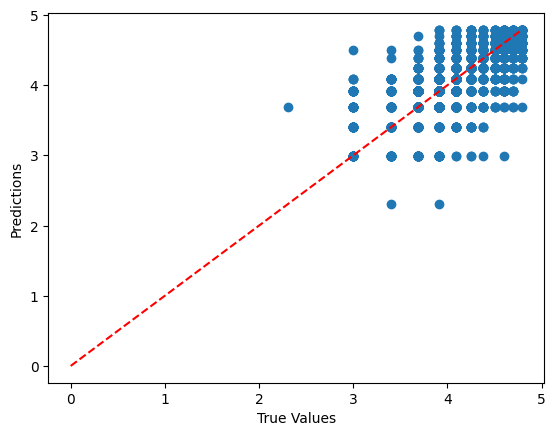

In [ ]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test, y_pred)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_parameter = {'max_depth': [None, 15, 20, 25],
              'min_samples_split': [20, 25, 30],
              'min_samples_leaf': [4, 8, 12]}

#grid search cv
grid_search = GridSearchCV(model, h_parameter, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

good_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    random_state=0)

# Fit the Algorithm
good_model.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = good_model.predict(X_test_scaled)

#evaluate the model
mse_dsT = mean_squared_error(y_test, y_pred)
r2_dsT = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_dsT)
print("R-squared: ", r2_dsT)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 20}
Mean squared error:  0.06822759738601195
R-squared:  0.49481912679292483


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
rf_model = RandomForestRegressor(random_state=0)

# Fit the Algorithm
rf_model.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = rf_model.predict(X_test_scaled)

#evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_rf)
print("R-squared: ", r2_rf)

Mean squared error:  0.043707122045868706
R-squared:  0.6763772589619723


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

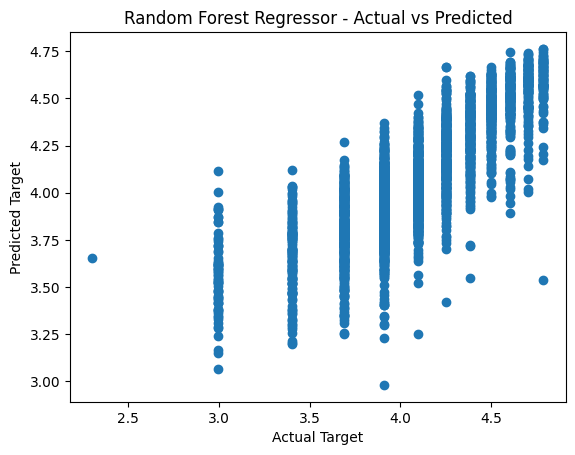

In [ ]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Random Forest Regressor - Actual vs Predicted')
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'n_estimators': [100, 500, 700],
    'max_depth': [None, 2, 5],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

# Fit the Algorithm
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = best_rf_model.predict(X_test_scaled)

mse_r_f = mean_squared_error(y_test, y_pred)
r2_r_f = r2_score(y_test, y_pred)


print('Mean Squared Error:', mse_r_f)
print('R2 Score:', r2_r_f)


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 700}
Mean Squared Error: 0.041772460341654494
R2 Score: 0.6907021674526764


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4

In [ ]:
# ML Model -  Implementation
xgb_model = xgb.XGBRegressor()

# Fit the Algorithm
xgb_model.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = xgb_model.predict(X_test_scaled)

#evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_xgb)
print("R-squared: ", r2_xgb)

Mean squared error:  0.0518106446776216
R-squared:  0.6163759574944591


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

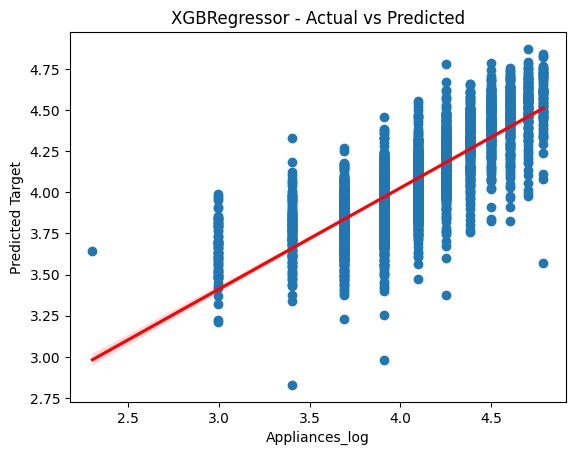

In [ ]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('XGBRegressor - Actual vs Predicted')

sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'n_estimators': [400, 600, 800],
    'max_depth': [10, 15, 20],
    'learning_rate': [ 0.3, 0.5, 0.7],
    'subsample': [1, 2, 4],
    'colsample_bytree': [1, 5, 10]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Fit the Algorithm
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = best_xgb_model.predict(X_test_scaled)

mse_xgbb = mean_squared_error(y_test, y_pred)
r2_xgbb = r2_score(y_test, y_pred)

print('Best hyperparameters:', grid_search.best_params_)
print('Mean Squared Error:', mse_xgbb)
print('R2 Score:', r2_xgbb)


Best hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 400, 'subsample': 1}
Mean Squared Error: 0.04858381232571479
R2 Score: 0.6402685471163139


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### All ML Models Score (After Using Hyperparameters) At One Place.


In [72]:
# All four ML Models Score at one place
# 1. Ridge & Lasso
mse_Ridge_percent = mse_ridge * 100
r2_ridge_percent = r2_ridge * 100
print("Ridge - Mean squared error: {:.2f}%".format(mse_Ridge_percent))
print("Ridge - R-squared : {:.2f}%".format(r2_ridge_percent))

mse_percent_lasso = mse_lasso * 100
r2_percent_lasso = r2_lasso * 100
print("Lasso - Mean squared error: {:.2f}%".format(mse_percent_lasso))
print("Lasso - R-squared: {:.2f}%".format(r2_percent_lasso))


# 2. DecisionTree
mse_dsT_percent = mse_dsT * 100
r2_dsT_percent = r2_dsT * 100
print("DecisionTree - Mean squared error: {:.2f}%".format(mse_dsT_percent))
print("DecisionTree - R-squared: {:.2f}%".format(r2_dsT_percent))


# 3. Random Forest
mse_percent_rf = mse_r_f * 100
r2_percent_rf = r2_r_f * 100
print("Random Forest - Mean squared error: {:.2f}%".format(mse_percent_rf))
print("Random Forest - R-squared: {:.2f}%".format(r2_percent_rf))


# 4. XG Boost
mse_xgbb_percent = mse_xgbb * 100
r2_xgbb_percent = r2_xgbb * 100

print("XG Boost - Mean squared error: {:.2f}%".format(mse_xgbb_percent))
print("XG Boost - R-squared: {:.2f}%".format(r2_xgbb_percent))


Ridge - Mean squared error: 9.12%
Ridge - R-squared : 32.44%
Lasso - Mean squared error: 9.13%
Lasso - R-squared: 32.38%
DecisionTree - Mean squared error: 6.82%
DecisionTree - R-squared: 49.48%
Random Forest - Mean squared error: 4.18%
Random Forest - R-squared: 69.07%
XG Boost - Mean squared error: 4.86%
XG Boost - R-squared: 64.03%


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***